# Problem 4

In [1]:
library(faraway)
data(teengamb)
teengamb$sex <- factor(teengamb$sex)
levels(teengamb$sex) <- c("male","female")
head(teengamb)

sex,status,income,verbal,gamble
female,51,2.00,8,0.0
female,28,2.50,8,0.0
female,37,2.00,6,0.0
female,28,7.00,4,7.3
female,65,2.00,8,19.6
female,61,3.47,6,0.1


In [2]:
linear_model <- lm(gamble ~ sex+status+income+verbal,teengamb)
summary(linear_model)


Call:
lm(formula = gamble ~ sex + status + income + verbal, data = teengamb)

Residuals:
    Min      1Q  Median      3Q     Max 
-51.082 -11.320  -1.451   9.452  94.252 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  22.55565   17.19680   1.312   0.1968    
sexfemale   -22.11833    8.21111  -2.694   0.0101 *  
status        0.05223    0.28111   0.186   0.8535    
income        4.96198    1.02539   4.839 1.79e-05 ***
verbal       -2.95949    2.17215  -1.362   0.1803    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 22.69 on 42 degrees of freedom
Multiple R-squared:  0.5267,	Adjusted R-squared:  0.4816 
F-statistic: 11.69 on 4 and 42 DF,  p-value: 1.815e-06


### (a) What percentage of variation in the response is explained by these predictors? - Multiple R-squared, which is 52.67%

In [3]:
max(linear_model$residuals)

[1] 94.25222

### (b) Which observation has the largest (positive) residual? Give the case number. - 24

In [4]:
which.max(linear_model$residuals)

24 
24

### (c) Compute the mean and median of the residuals.

In [5]:
mean(linear_model$residuals)

[1] 3.620958e-16

In [6]:
median(linear_model$residuals)

[1] -1.451392

### (d) Compute the correlation of the residuals with the fitted values.

In [7]:
cor(linear_model$residuals, linear_model$fitted.values)

[1] 1.173931e-16

### (e) Compute the correlation of the residuals with the income.

In [8]:
cor(linear_model$residuals, teengamb$income)

[1] 3.902219e-17

### (f) For all other predictors held constant, what would be the difference in predicted expenditure on gambling for a male compared to a female? - females spend 22.1183301 USD less on gambling than males 

In [9]:
linear_model$coefficients

(Intercept)    sexfemale       status       income       verbal 
 22.55565063 -22.11833009   0.05223384   4.96197922  -2.95949350

# Problem 5

In [10]:
data(prostate)
summary(prostate)

     lcavol           lweight           age             lbph        
 Min.   :-1.3471   Min.   :2.375   Min.   :41.00   Min.   :-1.3863  
 1st Qu.: 0.5128   1st Qu.:3.376   1st Qu.:60.00   1st Qu.:-1.3863  
 Median : 1.4469   Median :3.623   Median :65.00   Median : 0.3001  
 Mean   : 1.3500   Mean   :3.653   Mean   :63.87   Mean   : 0.1004  
 3rd Qu.: 2.1270   3rd Qu.:3.878   3rd Qu.:68.00   3rd Qu.: 1.5581  
 Max.   : 3.8210   Max.   :6.108   Max.   :79.00   Max.   : 2.3263  
      svi              lcp             gleason          pgg45       
 Min.   :0.0000   Min.   :-1.3863   Min.   :6.000   Min.   :  0.00  
 1st Qu.:0.0000   1st Qu.:-1.3863   1st Qu.:6.000   1st Qu.:  0.00  
 Median :0.0000   Median :-0.7985   Median :7.000   Median : 15.00  
 Mean   :0.2165   Mean   :-0.1794   Mean   :6.753   Mean   : 24.38  
 3rd Qu.:0.0000   3rd Qu.: 1.1786   3rd Qu.:7.000   3rd Qu.: 40.00  
 Max.   :1.0000   Max.   : 2.9042   Max.   :9.000   Max.   :100.00  
      lpsa        
 Min.   :-0.430

### (a) Fit a model with lpsa as the response and lcavol as the predictor. Display the scatterplot and the regression line. Report the residual standard error and the R Squared

Multiple R-squared:  0.539431908779019 
NULL
Residual standard error:  0.787499423513711 
NULL


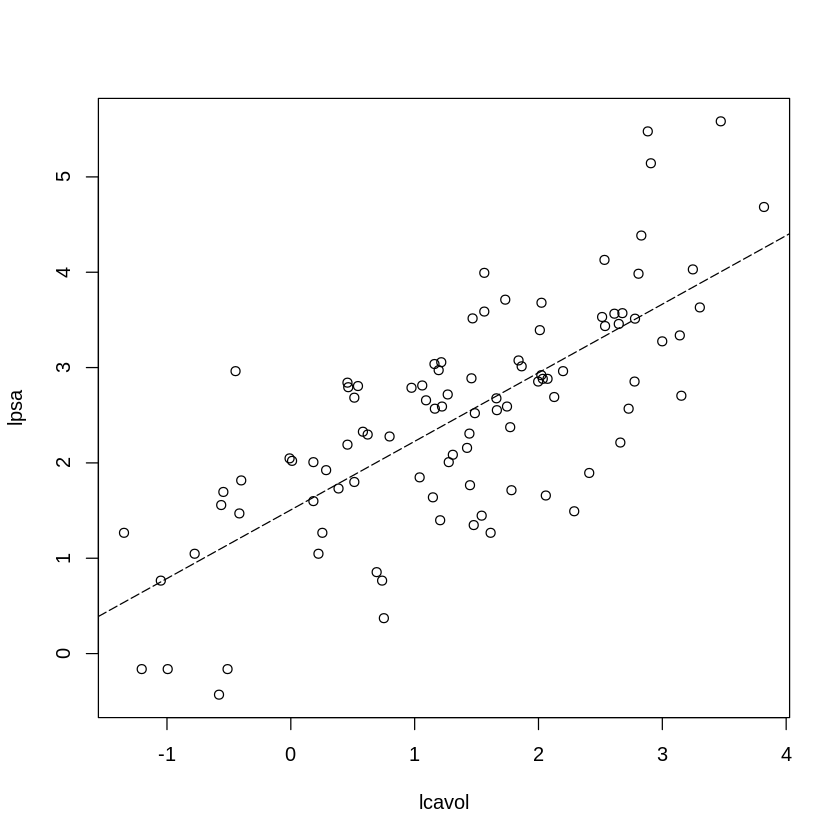

In [11]:
plot(lpsa~lcavol,prostate)
model<-lm(lpsa~lcavol,prostate)
abline(coef(model),lty=5)
print(cat("Multiple R-squared: ", (toString(summary(model)$r.squared)),"\n"))
print(cat("Residual standard error: ", (toString(summary(model)$sigma)),"\n"))

In [12]:
summary(model)


Call:
lm(formula = lpsa ~ lcavol, data = prostate)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.67625 -0.41648  0.09859  0.50709  1.89673 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.50730    0.12194   12.36   <2e-16 ***
lcavol       0.71932    0.06819   10.55   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7875 on 95 degrees of freedom
Multiple R-squared:  0.5394,	Adjusted R-squared:  0.5346 
F-statistic: 111.3 on 1 and 95 DF,  p-value: < 2.2e-16


In [13]:
attributes(summary(model))

$names
 [1] "call"          "terms"         "residuals"     "coefficients" 
 [5] "aliased"       "sigma"         "df"            "r.squared"    
 [9] "adj.r.squared" "fstatistic"    "cov.unscaled" 

$class
[1] "summary.lm"

In [14]:
r.squared<-c(summary(model)$r.squared)

In [15]:
r.stan.err<-c(summary(model)$sigma)

In [16]:
summary(prostate)

     lcavol           lweight           age             lbph        
 Min.   :-1.3471   Min.   :2.375   Min.   :41.00   Min.   :-1.3863  
 1st Qu.: 0.5128   1st Qu.:3.376   1st Qu.:60.00   1st Qu.:-1.3863  
 Median : 1.4469   Median :3.623   Median :65.00   Median : 0.3001  
 Mean   : 1.3500   Mean   :3.653   Mean   :63.87   Mean   : 0.1004  
 3rd Qu.: 2.1270   3rd Qu.:3.878   3rd Qu.:68.00   3rd Qu.: 1.5581  
 Max.   : 3.8210   Max.   :6.108   Max.   :79.00   Max.   : 2.3263  
      svi              lcp             gleason          pgg45       
 Min.   :0.0000   Min.   :-1.3863   Min.   :6.000   Min.   :  0.00  
 1st Qu.:0.0000   1st Qu.:-1.3863   1st Qu.:6.000   1st Qu.:  0.00  
 Median :0.0000   Median :-0.7985   Median :7.000   Median : 15.00  
 Mean   :0.2165   Mean   :-0.1794   Mean   :6.753   Mean   : 24.38  
 3rd Qu.:0.0000   3rd Qu.: 1.1786   3rd Qu.:7.000   3rd Qu.: 40.00  
 Max.   :1.0000   Max.   : 2.9042   Max.   :9.000   Max.   :100.00  
      lpsa        
 Min.   :-0.430

In [17]:
model<-lm(lpsa~lcavol+lweight,prostate)
summary(model)
r.squared<-c(r.squared,summary(model)$r.squared)
r.stan.err<-c(r.stan.err,summary(model)$sigma)


Call:
lm(formula = lpsa ~ lcavol + lweight, data = prostate)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.61965 -0.50778 -0.02095  0.52291  1.89885 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.30262    0.56904  -0.532  0.59612    
lcavol       0.67753    0.06626  10.225  < 2e-16 ***
lweight      0.51095    0.15726   3.249  0.00161 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7506 on 94 degrees of freedom
Multiple R-squared:  0.5859,	Adjusted R-squared:  0.5771 
F-statistic: 66.51 on 2 and 94 DF,  p-value: < 2.2e-16


In [18]:
model<-lm(lpsa~lcavol+lweight+svi,prostate)
summary(model)
r.squared<-c(r.squared,summary(model)$r.squared)
r.stan.err<-c(r.stan.err,summary(model)$sigma)


Call:
lm(formula = lpsa ~ lcavol + lweight + svi, data = prostate)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.72964 -0.45764  0.02812  0.46403  1.57013 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.26809    0.54350  -0.493  0.62298    
lcavol       0.55164    0.07467   7.388  6.3e-11 ***
lweight      0.50854    0.15017   3.386  0.00104 ** 
svi          0.66616    0.20978   3.176  0.00203 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7168 on 93 degrees of freedom
Multiple R-squared:  0.6264,	Adjusted R-squared:  0.6144 
F-statistic: 51.99 on 3 and 93 DF,  p-value: < 2.2e-16


In [19]:
model<-lm(lpsa~lcavol+lweight+svi+lbph,prostate)
summary(model)
r.squared<-c(r.squared,summary(model)$r.squared)
r.stan.err<-c(r.stan.err,summary(model)$sigma)


Call:
lm(formula = lpsa ~ lcavol + lweight + svi + lbph, data = prostate)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.82653 -0.42270  0.04362  0.47041  1.48530 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.14554    0.59747   0.244  0.80809    
lcavol       0.54960    0.07406   7.422 5.64e-11 ***
lweight      0.39088    0.16600   2.355  0.02067 *  
svi          0.71174    0.20996   3.390  0.00103 ** 
lbph         0.09009    0.05617   1.604  0.11213    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7108 on 92 degrees of freedom
Multiple R-squared:  0.6366,	Adjusted R-squared:  0.6208 
F-statistic: 40.29 on 4 and 92 DF,  p-value: < 2.2e-16


In [20]:
model<-lm(lpsa~lcavol+lweight+svi+lbph+age,prostate)
summary(model)
r.squared<-c(r.squared,summary(model)$r.squared)
r.stan.err<-c(r.stan.err,summary(model)$sigma)


Call:
lm(formula = lpsa ~ lcavol + lweight + svi + lbph + age, data = prostate)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.83505 -0.39396  0.00414  0.46336  1.57888 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.95100    0.83175   1.143 0.255882    
lcavol       0.56561    0.07459   7.583 2.77e-11 ***
lweight      0.42369    0.16687   2.539 0.012814 *  
svi          0.72095    0.20902   3.449 0.000854 ***
lbph         0.11184    0.05805   1.927 0.057160 .  
age         -0.01489    0.01075  -1.385 0.169528    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7073 on 91 degrees of freedom
Multiple R-squared:  0.6441,	Adjusted R-squared:  0.6245 
F-statistic: 32.94 on 5 and 91 DF,  p-value: < 2.2e-16


In [21]:
model<-lm(lpsa~lcavol+lweight+svi+lbph+age+lcp,prostate)
summary(model)
r.squared<-c(r.squared,summary(model)$r.squared)
r.stan.err<-c(r.stan.err,summary(model)$sigma)


Call:
lm(formula = lpsa ~ lcavol + lweight + svi + lbph + age + lcp, 
    data = prostate)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.82853 -0.40741  0.01695  0.47159  1.59040 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.93487    0.83577   1.119  0.26630    
lcavol       0.58765    0.08663   6.783  1.2e-09 ***
lweight      0.41808    0.16792   2.490  0.01462 *  
svi          0.78256    0.24261   3.226  0.00175 ** 
lbph         0.11381    0.05842   1.948  0.05452 .  
age         -0.01511    0.01081  -1.398  0.16546    
lcp         -0.04118    0.08135  -0.506  0.61392    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7102 on 90 degrees of freedom
Multiple R-squared:  0.6451,	Adjusted R-squared:  0.6215 
F-statistic: 27.27 on 6 and 90 DF,  p-value: < 2.2e-16


In [22]:
model<-lm(lpsa~lcavol+lweight+svi+lbph+age+lcp+pgg45,prostate)
summary(model)
r.squared<-c(r.squared,summary(model)$r.squared)
r.stan.err<-c(r.stan.err,summary(model)$sigma)


Call:
lm(formula = lpsa ~ lcavol + lweight + svi + lbph + age + lcp + 
    pgg45, data = prostate)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.73117 -0.38137 -0.01728  0.43364  1.63513 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.953926   0.829439   1.150  0.25319    
lcavol       0.591615   0.086001   6.879 8.07e-10 ***
lweight      0.448292   0.167771   2.672  0.00897 ** 
svi          0.757734   0.241282   3.140  0.00229 ** 
lbph         0.107671   0.058108   1.853  0.06720 .  
age         -0.019336   0.011066  -1.747  0.08402 .  
lcp         -0.104482   0.090478  -1.155  0.25127    
pgg45        0.005318   0.003433   1.549  0.12488    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7048 on 89 degrees of freedom
Multiple R-squared:  0.6544,	Adjusted R-squared:  0.6273 
F-statistic: 24.08 on 7 and 89 DF,  p-value: < 2.2e-16


In [23]:
model<-lm(lpsa~lcavol+lweight+svi+lbph+age+lcp+pgg45+gleason,prostate)
summary(model)
r.squared<-c(r.squared,summary(model)$r.squared)
r.stan.err<-c(r.stan.err,summary(model)$sigma)


Call:
lm(formula = lpsa ~ lcavol + lweight + svi + lbph + age + lcp + 
    pgg45 + gleason, data = prostate)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7331 -0.3713 -0.0170  0.4141  1.6381 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.669337   1.296387   0.516  0.60693    
lcavol       0.587022   0.087920   6.677 2.11e-09 ***
lweight      0.454467   0.170012   2.673  0.00896 ** 
svi          0.766157   0.244309   3.136  0.00233 ** 
lbph         0.107054   0.058449   1.832  0.07040 .  
age         -0.019637   0.011173  -1.758  0.08229 .  
lcp         -0.105474   0.091013  -1.159  0.24964    
pgg45        0.004525   0.004421   1.024  0.30886    
gleason      0.045142   0.157465   0.287  0.77503    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7084 on 88 degrees of freedom
Multiple R-squared:  0.6548,	Adjusted R-squared:  0.6234 
F-statistic: 20.86 on 8 and 88 DF,  p-value: < 2.2e-16


In [24]:
r.squared

[1] 0.5394319 0.5859345 0.6264403 0.6366035 0.6441024 0.6451130 0.6544317
[8] 0.6547541

In [25]:
r.stan.err

[1] 0.7874994 0.7506469 0.7168094 0.7108232 0.7073054 0.7102135 0.7047533
[8] 0.7084155

### (b) For each model, record the residual standard error and R Sqaured. Plot these two statistics, and comment on how they change as the model includes more predictor variables.
### R Squared increases while Residual Standar Error decreases.

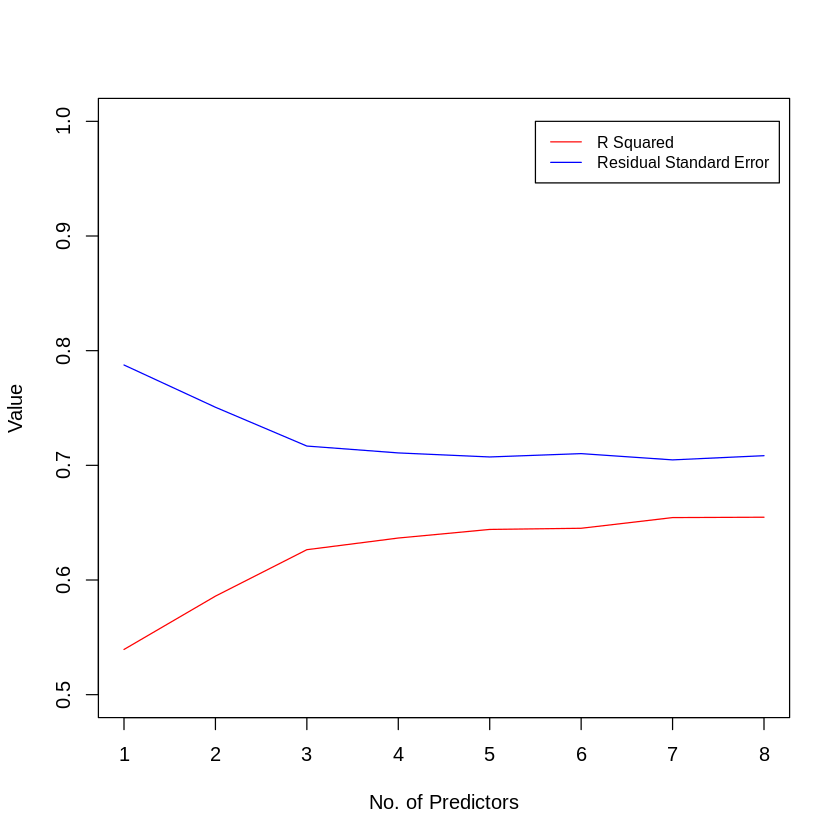

In [26]:
plot(r.squared,type="l",ylim=c(0.5,1),ylab="Value",xlab="No. of Predictors",col="red")
lines(r.stan.err,col="blue")
legend(5.5, 1, legend=c("R Squared", "Residual Standard Error"),
       col=c("red", "blue"), lty=1:1, cex=0.8)